In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import glob
import os
import json
import random
import string
from rapidfuzz.process import cdist
# 指定したフォルダ内のファイルを検索
cluster_id=2
#cluster_id=0
path_list = glob.glob(f"../data/categorized/{cluster_id}/*.jsonl")


In [19]:

all_lines=[]
for path in path_list:
    with open(path,"r") as f:
        lines=f.readlines()
    lines=[i[10:-3] for i in lines]
    #lines=[i[10:10+check_lengh] for i in lines]
    all_lines+=lines

#普通の重複検出
all_lines=list(set(all_lines))
len(all_lines)


49104

In [20]:
import time
import numpy as np
from src.RapidFuzzDedup import dedup_lines
check_lengh=100
check_n=5
n_workers=16
threshold=90
check_lines=all_lines[:check_n]
deduped_lines=dedup_lines(check_lines,check_length=check_length,n_workers=n_workers,threshold=threshold)

ImportError: cannot import name 'dedup_lines' from 'src.RapidFuzzDedup' (/media/hatakeyama/python/Dataset_for_BTM/01web_codes/src/RapidFuzzDedup.py)

: 

In [7]:
check_lines

['飛躍的な再生可能エネルギーの導入を確実に実現していくためには具体的な計画とこれに対する不断の検証が必要となる。まずは「グリーン政策大綱」を対象とし、その後も具体的な計画、実施、検証というPDCAサイク',
 '具体的な改善方法やアクションプランの策定に困っていませんか?',
 'これからも様々な可能性を追求して、あきらめることなく新たな挑戦をしていきますので、今後ともKSK北海道の活躍にご期待ください。',
 'アメリカにはプロフェッショナル・エンジニアリングというプログラムがあります。このプログラムはだれでも受講することができ、PEと呼ばれています。これに相当するものが日本でも早晩出てくる可能性があります。',
 '★ Emery:エネルギー推進の為に働くものもあれば、再生に関するものもあります。']

In [15]:

deduped_ids = get_deduped_ids(similarity_scores,threshold=30)
deduped_ids


[0, 1, 2, 3, 4]

In [9]:
similarity_scores

array([[100.      ,  10.769231,  19.631903,  13.      ,  19.858156],
       [ 10.769231, 100.      ,   8.602151,  15.384615,   8.450705],
       [ 19.631903,   8.602151, 100.      ,  18.404907,  11.538462],
       [ 13.      ,  15.384615,  18.404907, 100.      ,  21.276596],
       [ 19.858156,   8.450705,  11.538462,  21.276596, 100.      ]],
      dtype=float32)

In [34]:
# 重複を除外した行のIDリストを作成

# 重複されていない行のIDを出力
print(deduped_ids)

[0]


Text(0, 0.5, 'time (s)')

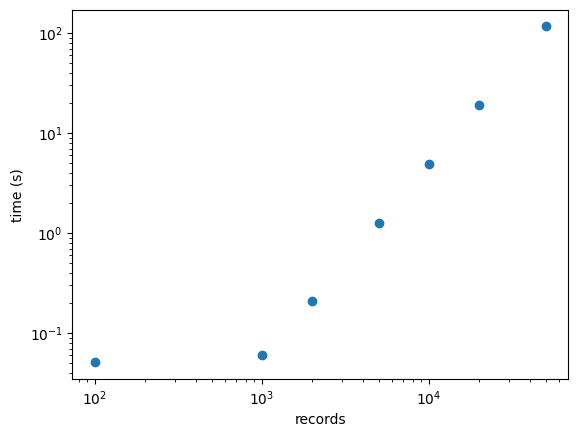

In [110]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.DataFrame(res_list)



plt.scatter(df["check_n"],df["time"])
#x軸をlogスケールにする
plt.yscale("log")
plt.xscale("log")
plt.xlabel("records")
plt.ylabel("time (s)")

In [ ]:

import joblib
from hojichar import deduplication, Document
class Deduplicator:
    def __init__(self, hasher, cache_path="cache", init=False):
        self.hasher = hasher
        self.cache_path = cache_path
        if init:
            self.seen = set()
        else:
            try:
                self.seen = joblib.load(self.cache_path)
            except FileNotFoundError:
                print("No cache found, initializing new cache.")
                self.seen = set()

    def is_duplicated(self, text):
        doc = Document(text)
        self.hasher.apply(doc)

        for lsh in doc.dedup_lsh:
            if lsh in self.seen:
                self.seen.add(lsh)
                return True

            self.seen.add(lsh)
        return False

    def save_state(self):
        joblib.dump(self.seen, self.cache_path)

In [92]:
check_n=10000
res_list=[]

for check_n in [100,200,500,1000,2000]:
    dedup=Deduplicator( deduplication.GenerateDedupLSH())
    start = time.time()
    for i in range(check_n):
        (dedup.is_duplicated(all_lines[i]))
    print(f"check_n:{check_n} time:{time.time()-start}")
    res_list.append({"check_n":check_n,"time":time.time()-start})

No cache found, initializing new cache.
check_n:100 time:4.875152587890625
No cache found, initializing new cache.
check_n:200 time:5.544226408004761
No cache found, initializing new cache.
check_n:500 time:8.497542381286621
No cache found, initializing new cache.
check_n:1000 time:12.539214372634888
No cache found, initializing new cache.
check_n:2000 time:24.438169240951538
